## Task  : Creating a NN which detects that if someone is happy or not 

In [1]:
import numpy as np
from keras import layers

In [2]:
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False

In [3]:
import math
import h5py

def load_dataset() : 
    train_dataset = h5py.File('datasets/train_happy.h5','r')
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])
    
    test_dataset = h5py.File('datasets/test_happy.h5','r')
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])
    
    classes = np.array(test_dataset['list_classes'][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig,train_set_y_orig,test_set_x_orig,test_set_y_orig,classes

In [4]:
X_train_orig,Y_train_orig,X_test_orig,Y_test_orig,classes = load_dataset()

# normalizing the vectors 
X_train = X_train_orig / 255;
X_test = X_test_orig / 255;

# Reshaping the labels
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

In [5]:
print(X_train.shape)
print(Y_train.shape)
print('-----')
print(X_test.shape)
print(Y_test.shape)
print('-----')
print(X_train.shape[0])
print(X_test.shape[0])

(600, 64, 64, 3)
(600, 1)
-----
(150, 64, 64, 3)
(150, 1)
-----
600
150


we got 600 training pictures and 150 test pictures of shape (64,64,3)

y = [0], human is sad


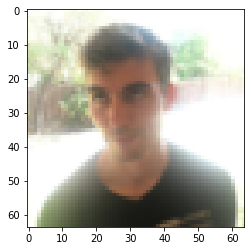

In [6]:
index = np.random.randint(0,601)
plt.imshow(X_train[index])
print("y = " + str(Y_train[index]) + ', human is ' + str('happy' if Y_train[index][0] else 'sad'))


In [7]:
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input

#### Model function

In [8]:
def EmotionalModel(input_shape) : 
    
    
    ''''
    We will have the ConvNet like this : 
    
    input -> {Conv2D -> BN -> Activation -> Maxpooling2D} *2 times -> Flatten -> Sigmoid
    '''
    
    X_input = Input(input_shape)
    
    # 32 filters of 3x3 size, stride = 1
    X = Conv2D(32,(3,3),strides=(1,1),name = 'conv0')(X_input)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2),name = 'maxpool')(X)
    
    # second conv layer
    X = Conv2D(16,(3,3),strides=(1,1),name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2),name = 'maxpool2')(X)
    
    # Flattening 
    X = Flatten()(X)
    X = Dense(1,activation = 'sigmoid',name = 'fc')(X)
    
    # Creating instance of keras model
    model = Model(inputs = X_input,outputs = X,name = 'EmotionalModel')
    
    return model
    

In [9]:
X_train.shape

(600, 64, 64, 3)

#### Creating the model 

In [10]:
emotionalModel = EmotionalModel(X_train.shape[1:])

#### Compiling the model

In [11]:
emotionalModel.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

#### Training the model

In [12]:
emotionalModel.fit(X_train,Y_train,batch_size=16,epochs = 40)

Epoch 1/40
38/38 [==============================] - 1s 22ms/step - loss: 0.6011 - accuracy: 0.6933
Epoch 2/40
38/38 [==============================] - 1s 22ms/step - loss: 0.2675 - accuracy: 0.9108
Epoch 3/40
38/38 [==============================] - 1s 23ms/step - loss: 0.1818 - accuracy: 0.9364
Epoch 4/40
38/38 [==============================] - 1s 24ms/step - loss: 0.1173 - accuracy: 0.9641
Epoch 5/40
38/38 [==============================] - 1s 23ms/step - loss: 0.1159 - accuracy: 0.9547
Epoch 6/40
38/38 [==============================] - 1s 24ms/step - loss: 0.0704 - accuracy: 0.9880
Epoch 7/40
38/38 [==============================] - 1s 23ms/step - loss: 0.0395 - accuracy: 0.9937
Epoch 8/40
38/38 [==============================] - 1s 22ms/step - loss: 0.0417 - accuracy: 0.9950
Epoch 9/40
38/38 [==============================] - 1s 23ms/step - loss: 0.0417 - accuracy: 0.9843
Epoch 10/40
38/38 [==============================] - 1s 24ms/step - loss: 0.0280 - accuracy: 0.9938
Epoch 11/

#### Model evaluation

In [13]:
preds = emotionalModel.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 10ms/step - loss: 0.0550 - accuracy: 0.9800


In [14]:
print("Loss = " + str(preds[0]))
print("Test Accuracy = " + str(preds[1]))

Loss = 0.05501031130552292
Test Accuracy = 0.9800000190734863


#### So for 40 epochs and 16 as the mini batch size , our small ConvNet did pretty great, giving us an accuracy of 95.34 % on test set , but we can say it is clearly overfitting on training time with a 100% accuracy

In [15]:
## let's test with our own image

Predicted : 
happy human


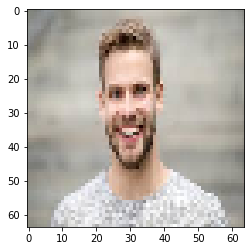

In [16]:
img = 'images/happy_man.jpeg'
img = image.load_img(img,target_size = (64,64))
plt.imshow(img)

x  = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)
pred = (emotionalModel.predict(x))
print('Predicted : ')
print('happy human' if pred[0]==1 else 'sad human')

In [17]:
import os
from IPython import display
import time

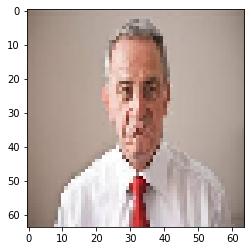

Predicted : 
happy human


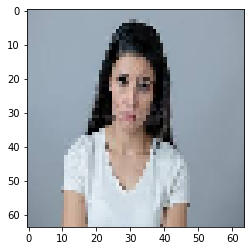

Predicted : 
happy human


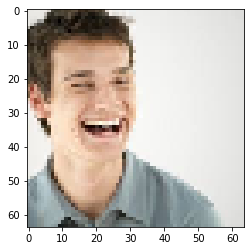

Predicted : 
happy human


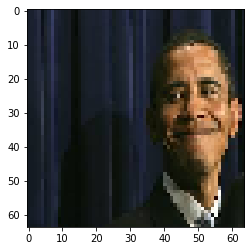

Predicted : 
happy human


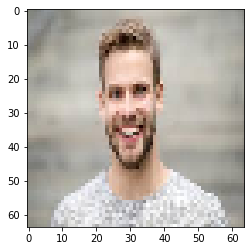

Predicted : 
happy human


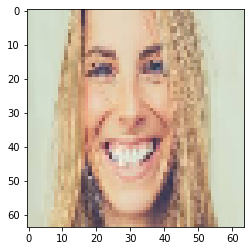

Predicted : 
happy human


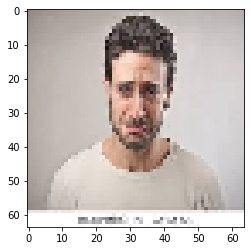

Predicted : 
happy human


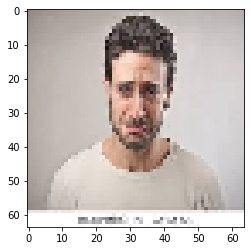

In [18]:
for img_path in os.listdir('./images/'):
    img_path = os.path.join('images',img_path)
    img = image.load_img(img_path,target_size = (64,64))
    
    plt.gca().clear()
    plt.imshow(img);
    display.display(plt.gcf())
    time.sleep(1.0) # wait one second
    
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis = 0)
    x = preprocess_input(x)
    pred = (emotionalModel.predict(x))
    print("Predicted : ")
    print("happy human" if pred[0]==1 else 'sad human')

 Well it detects fairly well, but has problem with sad faces, main reason is because it is overfitted on just a simple
training data set of people just standing in a similar fashion with similar shirts

In [19]:
emotionalModel.summary()

Model: "EmotionalModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 62, 62, 32)        896       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 62, 62, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 62, 62, 32)        0         
_________________________________________________________________
maxpool (MaxPooling2D)       (None, 31, 31, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 29, 29, 16)        4624      
_________________________________________________________________
bn1 (BatchNormalization)     (None, 29, 29, 16)     

model.summary(): prints the details of your layers in a table with the sizes of its inputs/outputs
